In [1]:
import sys
sys.path.append("../util/")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#%matplotlib auto

In [2]:
def percetron(dataset, eta = 0.5):
    weights = np.zeros(dataset.shape[1]-1)
    bias = 0.0
    np.random.shuffle(dataset)
    for i in range(10):
        for example in dataset:
            y = np.dot(weights, example[:2])+bias
            if (y < 0):
                y = -1
            else:
                y = +1
            weights += eta*(example[2]-y)*example[:2]
            bias += eta*(example[2]-y)
    return weights, bias

In [3]:
def batch_percetron(dataset, eta=0.8):
    weights = np.zeros(dataset.shape[1]-1)
    bias = 0.0
    for i in range(50):
        np.random.shuffle(dataset)
        for example in dataset:
            y = np.dot(weights, example[:2])+bias
            if (y < 0):
                y = -1
            else:
                y = +1
            tmp = np.zeros(dataset.shape[1]-1)
            tmp1 = 0.0
            if (example[2] != y):
                tmp += example[:2]*example[2]
                tmp1 += example[2]
        weights += eta*tmp
        bias += eta*tmp1
    return weights, bias

[ 0.55449319 22.5704606 ] 7.0 0.0


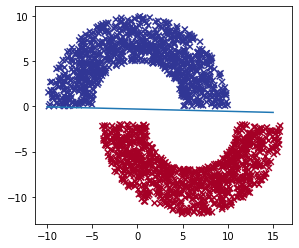

[-7.01413236 10.22185175] 0.0 0.097


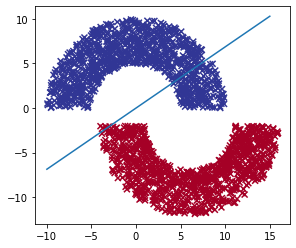

In [4]:
if (__name__ == "__main__"):
    from ipynb.fs.full.data_generator_2d import double_moon, gaussian_2d, visualize_data
    from ipynb.fs.full.test_bench import test
    test(percetron)
    test(batch_percetron)